# COSMO dataset first look

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [5]:
from src import data

In [6]:
# The conversion to `pd.Categorical` fails spectacularly, so we will do without it.
df = pd.read_spss(f"{data.data_root}/external/COSMO/INSERM.sav", convert_categoricals=False) 

In [28]:
df_aff = df.filter(regex='TIME|^AFF_[^H]',axis=1).dropna(axis=1)

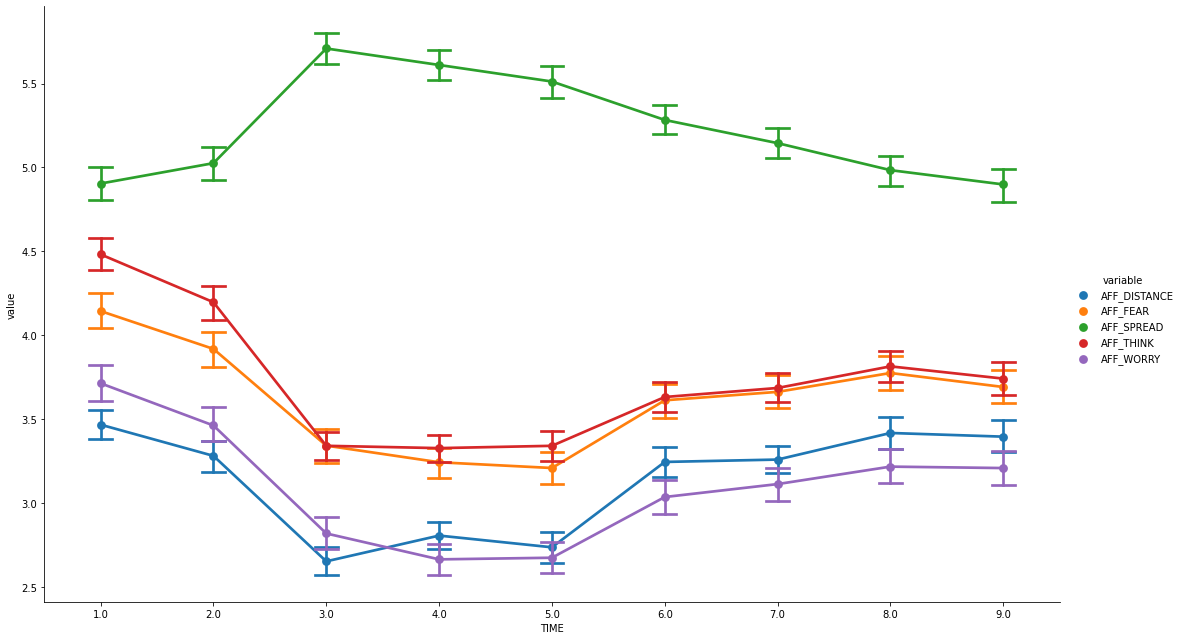

In [28]:
sns.catplot(
    data=df_aff.melt('TIME', var_name='variable', value_name='value'),
    x='TIME', 
    y='value',
    hue='variable',
    kind='point',
    capsize=0.2,
    height=9,
    aspect=15/9
)

In [29]:
df_aff.groupby('TIME').mean()

,AFF_DISTANCE,AFF_FEAR,AFF_SPREAD,AFF_THINK,AFF_WORRY
TIME,,,,,
1.0,3.466598,4.143885,4.904419,4.482014,3.713258
2.0,3.280538,3.918219,5.025880,4.196687,3.461698
3.0,2.651575,3.341535,5.709646,3.340551,2.817913
4.0,2.805206,3.242370,5.611311,3.326750,2.663375
5.0,2.735409,3.208171,5.512646,3.340467,2.673152
6.0,3.244379,3.611926,5.283480,3.631476,3.035191
7.0,3.258470,3.662149,5.145208,3.685382,3.112294
8.0,3.416996,3.774704,4.984190,3.814229,3.216403
9.0,3.395098,3.691176,4.899020,3.741176,3.207843


In [12]:
from sklearn.decomposition import PCA

In [30]:
pca_aff = PCA(n_components=1)
aff = pca_aff.fit_transform(df_aff.groupby('TIME').mean().values)

In [31]:
pca_aff.components_

array([[ 0.40077654,  0.42424603, -0.39862207,  0.52506254,  0.4741342 ]])

In [33]:
pca_aff.explained_variance_ratio_

array([0.92326888])

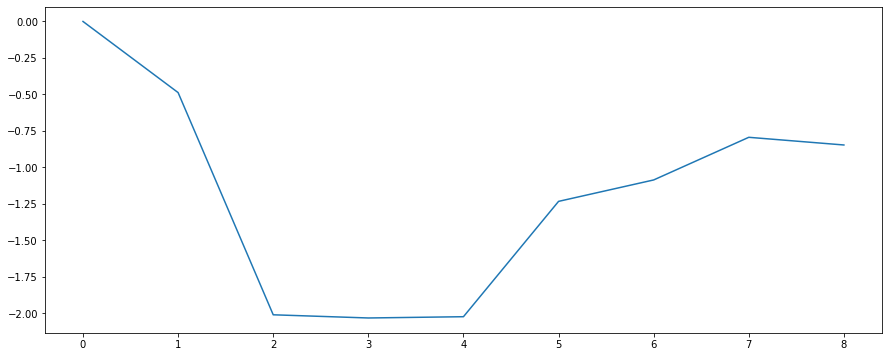

In [34]:
plt.plot(aff -aff[0])

In [35]:
df_aff = df.filter(regex='TIME|^POL_|^AFF_',axis=1).dropna(axis=1)

In [36]:
pca_aff = PCA(n_components=1)
aff = pca_aff.fit_transform(df_aff.groupby('TIME').mean().values)

In [37]:
pca_aff.components_

array([[ 0.21478284,  0.24168783, -0.18667008, -0.22167501,  0.30807103,
         0.27498766, -0.34023831,  0.00206942,  0.29382986, -0.66245109]])

In [38]:
pca_aff.explained_variance_ratio_

array([0.91966489])

In [44]:
aff -= aff[0]

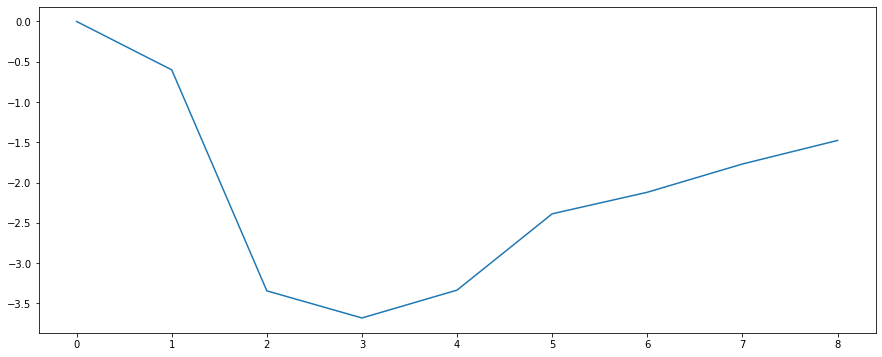

In [45]:
plt.plot(aff)

In [46]:
dates = [
    '2020-03-04', 
    '2020-03-11',
    '2020-03-18', 
    '2020-03-25',
    '2020-04-01', 
    '2020-04-08', 
    '2020-04-15',
    '2020-04-22', 
    '2020-04-29', 
]

In [47]:
df = pd.DataFrame(aff, columns=['phi'], index=dates)

In [48]:
df

,phi
2020-03-04,0.000000
2020-03-11,-0.600903
2020-03-18,-3.344974
2020-03-25,-3.681737
2020-04-01,-3.335687
2020-04-08,-2.388290
2020-04-15,-2.120680
2020-04-22,-1.770087
2020-04-29,-1.477353
